<a href="https://colab.research.google.com/github/Teacher-Heiko/fashion-mnist/blob/master/Fashion_MNIST_training_loop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Load repository and dataset***

In [151]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [152]:
!git clone https://github.com/zalandoresearch/fashion-mnist

fatal: destination path 'fashion-mnist' already exists and is not an empty directory.


In [153]:
import sys
sys.path.append('fashion-mnist/utils')


In [154]:
import mnist_reader # from utils folder
X_train, y_train = mnist_reader.load_mnist('fashion-mnist/data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('fashion-mnist/data/fashion', kind='t10k')

In [155]:
len(X_train)

60000

In [156]:
type(X_train[0])

numpy.ndarray

In [157]:
len(X_test)

10000

***Prepare images of bags label 8***

In [158]:
eights = []
for index in range(len(y_train)) :
  if y_train[index] == 8 :
    eights.append(index)

len(eights)

6000

In [159]:

images = [X_train[i] for i in eights]
len(images)

6000

In [160]:
import numpy as np
imgs_8 = np.array(images)

In [161]:
import numpy as np
import matplotlib.pyplot as plt

def display_random_images(X, y, num_images=5):
    """
    Display random images from the given dataset along with their labels.

    Parameters:
    - X: The dataset containing images.
    - y: The corresponding labels.
    - num_images: Number of random images to display (default is 5).
    """
    # Generate random indices to select random images
    random_indices = np.random.randint(0, len(X), num_images)

    # Create a grid of subplots to display the images
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

    for i, idx in enumerate(random_indices):
        # Display the image
        axes[i].imshow(X[idx].reshape(28, 28), cmap='gray')
        axes[i].set_title(f"Label: {y[idx]}")
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

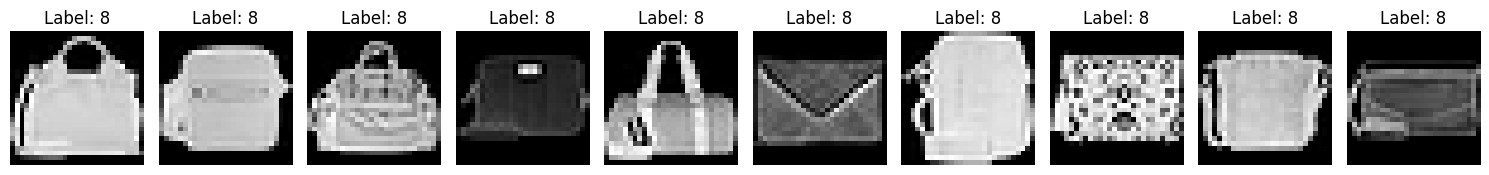

In [162]:
display_random_images(imgs_8, [8]*6000, num_images=10)

In [163]:
imgs_8.shape

(6000, 784)

In [164]:
nines = []
for index in range(len(y_train)) :
  if y_train[index] == 9 :
    nines.append(index)

len(nines)

6000

In [165]:

images = [X_train[i] for i in nines]
len(images)

6000

In [166]:

imgs_9 = np.array(images)

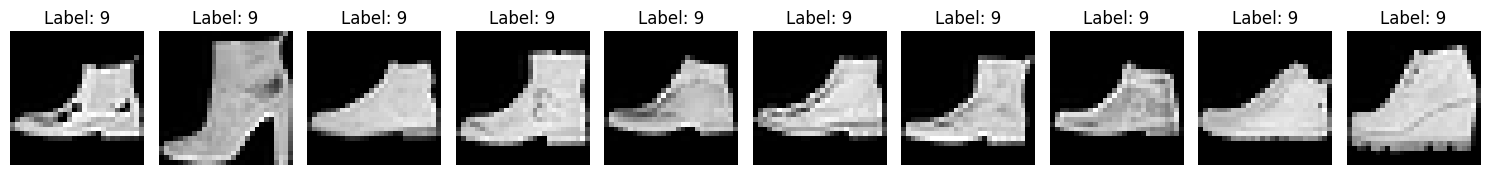

In [167]:
display_random_images(imgs_9, [9]*6000, num_images=10)

In [168]:
import torch
eights_tens = torch.tensor(imgs_8)
eights_tens.shape

torch.Size([6000, 784])

In [169]:

nines_tens = torch.tensor(imgs_9).view(-1, 28*28)
nines_tens.shape

torch.Size([6000, 784])

In [170]:
eights_tens = eights_tens.float()/255
nines_tens = nines_tens.float()/255

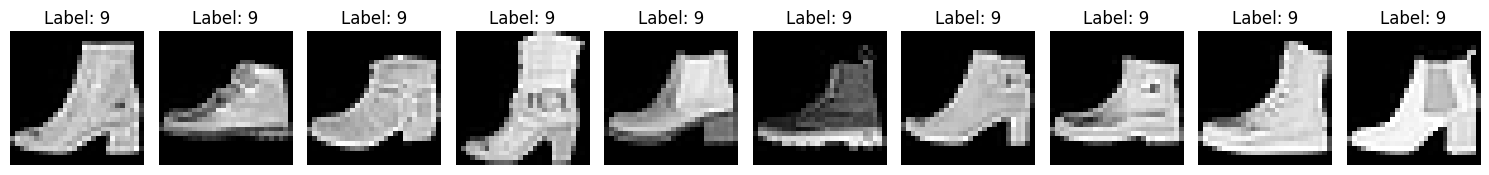

In [171]:
display_random_images(nines_tens, [9]*6000, num_images=10)

In [172]:

train_x = torch.cat([eights_tens, nines_tens])
train_x.shape

torch.Size([12000, 784])

In [173]:
train_y = torch.tensor([8]*len(eights) + [9]*len(nines)).unsqueeze(1)
train_x.shape,train_y.shape

(torch.Size([12000, 784]), torch.Size([12000, 1]))

In [174]:
len(train_y)

12000

In [175]:
dset = list(zip(train_x,train_y))
x,y = dset[0]
x.shape,y

(torch.Size([784]), tensor([8]))

In [177]:
dl = DataLoader(dset, batch_size=256)

In [178]:
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()

In [179]:
y.shape


torch.Size([1])

In [180]:
len(y)

1

In [181]:
y[:10]

tensor([8])

***Function to prepare tensors***

In [182]:
def prepare_tensors(X,y, label) :
  """
  X = training or validation set
  y = label set
  label = Fashion MNIST label e.g. 8 is bags
  """
  indices = []
  for index in range(len(y)) :
    if y[index] == label :
      indices.append(index)

  images = np.array([X[i] for i in indices])


  return torch.tensor(images).view(-1, 28*28)

In [183]:
eight_tens = prepare_tensors(X_train, y_train, 8)
eight_tens.shape

torch.Size([6000, 784])

In [184]:
nine_tens = prepare_tensors(X_train, y_train, 9)
nine_tens.shape

torch.Size([6000, 784])

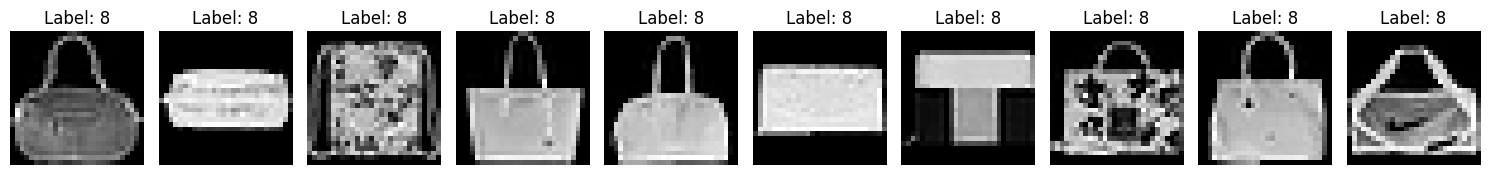

In [185]:
display_random_images(eight_tens, [8]*len(eight_tens), num_images=10)

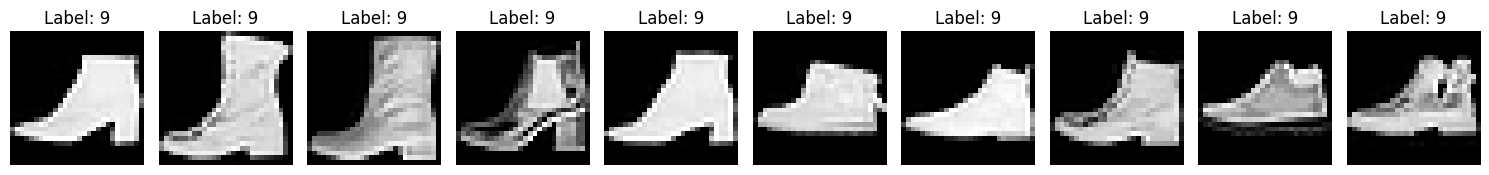

In [186]:
display_random_images(nines_tens, [9]*len(nine_tens), num_images=10)

***Normalize***

In [187]:
eight_tens = eight_tens.float()/255
nine_tens = nine_tens.float()/255
eight_tens.shape, nine_tens.shape

(torch.Size([6000, 784]), torch.Size([6000, 784]))

In [188]:
train_x = torch.cat([eight_tens, nine_tens]).view(-1, 28*28)
train_x.shape

torch.Size([12000, 784])

***Prepare labels***

In [189]:
train_y = tensor([8]*len(eight_tens) + [9]*len(nine_tens)).unsqueeze(1)
train_x.shape,train_y.shape

(torch.Size([12000, 784]), torch.Size([12000, 1]))

***Prepare training set tuple***

In [190]:
train_dset = list(zip(train_x,train_y))
len(train_dset)

12000

***Repeat for validation/test set***

In [191]:
X_test.shape, y_test.shape

((10000, 784), (10000,))

In [192]:
valid_eight_tens = prepare_tensors(X_test, y_test, 8)
valid_eight_tens.shape

torch.Size([1000, 784])

In [193]:
valid_nine_tens = prepare_tensors(X_test, y_test, 8)
valid_nine_tens.shape

torch.Size([1000, 784])

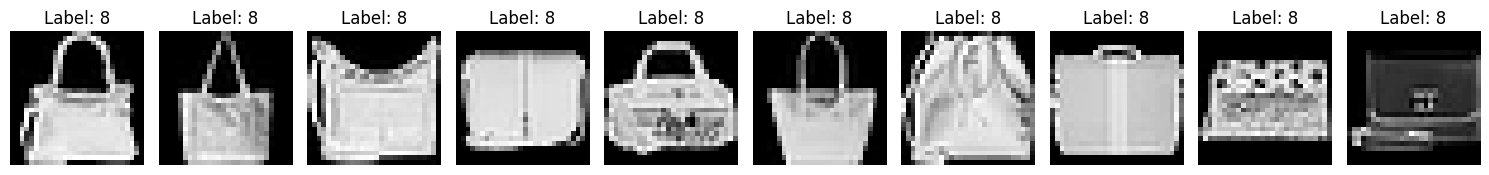

In [194]:
display_random_images(valid_eight_tens, [8]*len(valid_eight_tens), num_images=10)

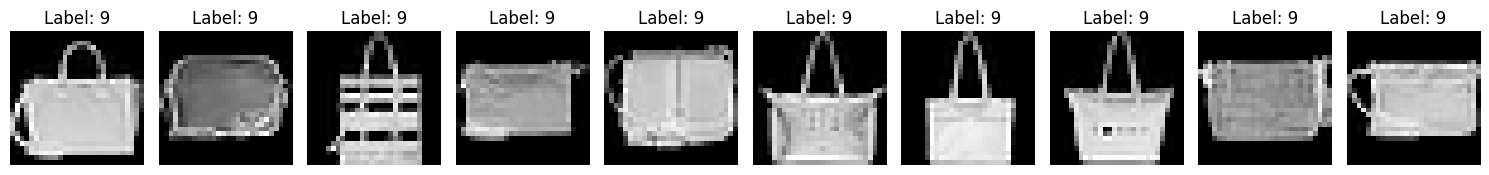

In [195]:
display_random_images(valid_nine_tens, [9]*len(valid_nine_tens), num_images=10)

In [196]:
valid_eight_tens = valid_eight_tens.float()/255
valid_nine_tens = valid_nine_tens.float()/255
valid_eight_tens.shape, valid_nine_tens.shape

(torch.Size([1000, 784]), torch.Size([1000, 784]))

In [197]:
test_x = torch.cat([valid_eight_tens, valid_nine_tens])
test_x.shape

torch.Size([2000, 784])

In [198]:
test_y = tensor([8]*len(valid_eight_tens) + [9]*len(valid_nine_tens)).unsqueeze(1)
test_x.shape,test_y.shape

(torch.Size([2000, 784]), torch.Size([2000, 1]))

In [199]:
test_dset = list(zip(test_x,test_y))
len(test_dset)

2000

***Prepare training loop***


In [326]:
def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()

In [357]:
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()

In [358]:
weights = init_params((28*28,1))

In [359]:
bias = init_params(1)

In [360]:
params = weights,bias

In [361]:
dl = DataLoader(train_dset, batch_size=256)
xb,yb = first(dl)
xb.shape,yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [362]:
valid_dl = DataLoader(test_dset, batch_size=256)
xb,yb = first(valid_dl)
xb.shape,yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [363]:
def linear1(xb): return xb@weights + bias

In [364]:
batch = train_x[0:4]
batch.shape

torch.Size([4, 784])

In [371]:
batch

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [365]:
preds = linear1(batch)
preds

tensor([[-20.6698],
        [-10.1688],
        [  0.7616],
        [-21.9145]], grad_fn=<AddBackward0>)

In [369]:
preds

tensor([[-20.6698],
        [-10.1688],
        [  0.7616],
        [-21.9145]], grad_fn=<AddBackward0>)

In [370]:
train_y[:4]

tensor([[8],
        [8],
        [8],
        [8]])

In [366]:
(preds>0.0).float() == train_y[:4]

tensor([[False],
        [False],
        [False],
        [False]])

In [367]:
loss = mnist_loss(preds, train_y[:4])
loss

tensor(0.1704, grad_fn=<MeanBackward0>)

In [368]:
def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb)
    loss.backward()

In [323]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.shape,weights.grad.mean(),bias.grad

(torch.Size([784, 1]), tensor(0.0038), tensor([0.0146]))

In [324]:
(preds>0.0).float() == train_y[:4]

tensor([[False],
        [False],
        [False],
        [False]])

In [309]:
def train_epoch(model, lr, params):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        for p in params:
            p.data -= p.grad*lr
            p.grad.zero_()

In [258]:
def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds>0.5) == yb
    return correct.float().mean()

In [259]:
batch_accuracy(linear1(batch), train_y[:4])

tensor(0.)

In [260]:
def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb,yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)

In [261]:
validate_epoch(linear1)

0.0

In [262]:
lr = 1.
params = weights,bias
train_epoch(linear1, lr, params)
validate_epoch(linear1)

0.0

In [263]:
def train_model(model, epochs):
    for i in range(epochs):
        train_epoch(model, lr, params)
        print(validate_epoch(model), end=' ')

In [264]:
lr = 1.
params = weights,bias

In [265]:
train_epoch(linear1, lr, params)